In [1]:
import pandas as pd

train_data = pd.read_csv("random_hazard_train0314.csv")
test_data = pd.read_csv("random_hazard_test0314.csv")

train_default = train_data[train_data['Default?'] == 1].copy()
test_default = test_data[test_data['Default?'] == 1].copy()


In [2]:
train_default["loss_ratio"] = train_default.GrossChargeOffAmount/train_default.GrossApproval
import numpy as np
train_default.loss_ratio = np.minimum(1.0,train_default.loss_ratio)

test_default["loss_ratio"] = test_default.GrossChargeOffAmount/test_default.GrossApproval
test_default.loss_ratio = np.minimum(1.0,test_default.loss_ratio)

In [3]:
cols_to_keep = ['ApprovalFiscalYear',
 'DeliveryMethod',
 'subpgmdesc',
 'TermInMonths',
 'BusinessType',
 'SP500_Yearly_Return',
 'CPI',
 'Yearly_Unemployment_Rate',
 'Log_Yearly_Unemployment_Rate_Norm',
 'Log_HPI_Norm',
 'ThirdPartyDollars_Norm',
 'TermMultipleYear',
 'RepeatBorrower',
 'BankStateneqBorrowerState',
 'ProjectStateneqBorrowerState',
 '2DigitNaics',
 'DaysToDefault',
 'loss_ratio']
train_default = train_default[cols_to_keep]
test_default = test_default[cols_to_keep]

In [4]:
x_train = pd.get_dummies(train_default)
x_test = pd.get_dummies(test_default)

In [5]:
x_train.columns

Index(['ApprovalFiscalYear', 'TermInMonths', 'SP500_Yearly_Return', 'CPI',
       'Yearly_Unemployment_Rate', 'Log_Yearly_Unemployment_Rate_Norm',
       'Log_HPI_Norm', 'ThirdPartyDollars_Norm', 'TermMultipleYear',
       'RepeatBorrower', 'BankStateneqBorrowerState',
       'ProjectStateneqBorrowerState', 'DaysToDefault', 'loss_ratio',
       'DeliveryMethod_504', 'DeliveryMethod_504REFI', 'DeliveryMethod_ALP',
       'DeliveryMethod_PCLP', 'subpgmdesc_504 Refinance',
       'subpgmdesc_Sec. 504 - Delta loans, funded 9/26/95',
       'subpgmdesc_Sec. 504 - Loan Guarantees - Private Sector Financed',
       'subpgmdesc_Sec. 504 - Premier Certified Lender Program',
       'BusinessType_CORPORATION', 'BusinessType_INDIVIDUAL',
       'BusinessType_MISSING', 'BusinessType_PARTNERSHIP', '2DigitNaics_11',
       '2DigitNaics_21', '2DigitNaics_22', '2DigitNaics_23', '2DigitNaics_31',
       '2DigitNaics_32', '2DigitNaics_33', '2DigitNaics_42', '2DigitNaics_44',
       '2DigitNaics_45', '2Di

In [6]:
## some values might not appear in one set compared to the other

extra_cols = set(x_train.columns) - set(x_test.columns)
for cols in extra_cols:
    x_test[cols] = 0

In [7]:
x_train.columns

Index(['ApprovalFiscalYear', 'TermInMonths', 'SP500_Yearly_Return', 'CPI',
       'Yearly_Unemployment_Rate', 'Log_Yearly_Unemployment_Rate_Norm',
       'Log_HPI_Norm', 'ThirdPartyDollars_Norm', 'TermMultipleYear',
       'RepeatBorrower', 'BankStateneqBorrowerState',
       'ProjectStateneqBorrowerState', 'DaysToDefault', 'loss_ratio',
       'DeliveryMethod_504', 'DeliveryMethod_504REFI', 'DeliveryMethod_ALP',
       'DeliveryMethod_PCLP', 'subpgmdesc_504 Refinance',
       'subpgmdesc_Sec. 504 - Delta loans, funded 9/26/95',
       'subpgmdesc_Sec. 504 - Loan Guarantees - Private Sector Financed',
       'subpgmdesc_Sec. 504 - Premier Certified Lender Program',
       'BusinessType_CORPORATION', 'BusinessType_INDIVIDUAL',
       'BusinessType_MISSING', 'BusinessType_PARTNERSHIP', '2DigitNaics_11',
       '2DigitNaics_21', '2DigitNaics_22', '2DigitNaics_23', '2DigitNaics_31',
       '2DigitNaics_32', '2DigitNaics_33', '2DigitNaics_42', '2DigitNaics_44',
       '2DigitNaics_45', '2Di

In [8]:
Y_train = x_train.loss_ratio
X_train = x_train.drop(columns = ["loss_ratio"])

baseline model, LR

In [9]:
import statsmodels.api as sm

loss_model = sm.OLS(Y_train, X_train.astype(float)).fit()
loss_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             loss_ratio   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:35:46   Log-Likelihood:                -634.07
No. Observations:                7177   AIC:                             1356.
Df Residuals:                    7133   BIC:                             1659.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
ApprovalFiscalYear                                                  0.0662      0.002     29.738      0.000       0.062       0.071
TermInMonths                                                        0.0006      0.000      4.536      0.000       0.000       0.001
SP500_Yearly_Return                                                -0.0905      0.024     -3.772      0.000      -0.138      -0.043
CPI                                                                -0.2258      0.053     -4.277      0.000      -0.329      -0.122
Yearly_Unemployment_Rate                                           -0.0254      0.012     -2.031      0.042      -0.050      -0.001
Log_Yearly_Unemployment_Rate_Norm                                   0.0395      0.018      2.144      0.032       0.003       0.076
Log_HPI_Norm                                                       -0.0083      0.004     -1.887      0.059      -0.017       0.000
ThirdPartyDollars_Norm                                              0.0025      0.002      1.166      0.244      -0.002       0.007
TermMultipleYear                                                   -0.2239      0.078     -2.881      0.004      -0.376      -0.072
RepeatBorrower                                                      0.0134      0.013      1.019      0.308      -0.012       0.039
BankStateneqBorrowerState                                          -0.0059      0.012     -0.509      0.611      -0.028       0.017
ProjectStateneqBorrowerState                                       -0.0944      0.059     -1.609      0.108      -0.209       0.021
DaysToDefault                                                    8.205e-05   3.76e-06     21.834      0.000    7.47e-05    8.94e-05
DeliveryMethod_504                                                -41.6291      1.396    -29.822      0.000     -44.365     -38.893
DeliveryMethod_504REFI                                            -41.5396      1.405    -29.573      0.000     -44.293     -38.786
DeliveryMethod_ALP                                                -41.6409      1.397    -29.817      0.000     -44.379     -38.903
DeliveryMethod_PCLP                                               -41.5510      1.396    -29.762      0.000     -44.288     -38.814
subpgmdesc_504 Refinance                                          -41.5396      1.405    -29.573      0.000     -44.293     -38.786
subpgmdesc_Sec. 504 - Delta loans, funded 9/26/95                 -41.8184      1.406    -29.738      0.000     -44.575     -39.062
subpgmdesc_Sec. 504 - Loan Guarantees - Private Sector Financed   -41.4516      1.401    -29.596      0.000     -44.197     -38.706
subpgmdesc_Sec. 504 - Premier Certified Lender 

In [10]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_train, loss_model.predict(X_train))

0.06986566186524686

In [11]:
Y_test = x_test.loss_ratio
X_test = x_test.drop(columns = ["loss_ratio"])

In [12]:
predicted = loss_model.predict(X_test)

error = mean_squared_error(Y_test, predicted)
print(error)

94.57163406930628


trying other models



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm

Regression and Tree Regression algorithms

In [14]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

Ensable Models


In [15]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [18]:
names = []
kfold_results = []
test_results = []
train_results = []
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error' 


for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.070798 (0.003922) 0.069866 0.209469


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LASSO: 0.120595 (0.008084) 0.120455 0.117718


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


EN: 0.091701 (0.005961) 0.091514 0.089082


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.090749 (0.004569) 0.058314 0.089839


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CART: 0.115665 (0.006990) 0.000000 0.125165


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVR: 0.128971 (0.011455) 0.128567 0.127034


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ABR: 0.072530 (0.004788) 0.078219 0.075075


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GBR: 0.061505 (0.004523) 0.056297 0.058235


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RFR: 0.061868 (0.004794) 0.008735 0.059148


/Users/weihongho/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ETR: 0.068479 (0.006027) 0.000000 0.067728


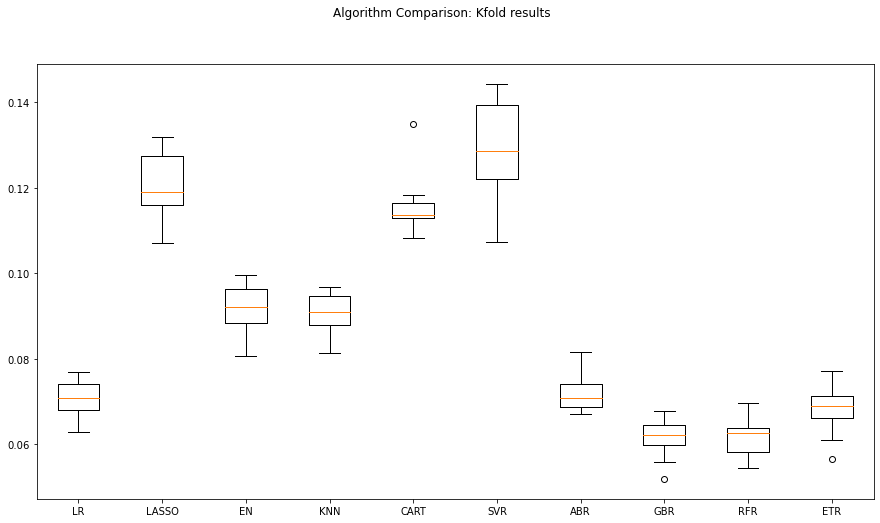

In [19]:
from matplotlib import pyplot

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

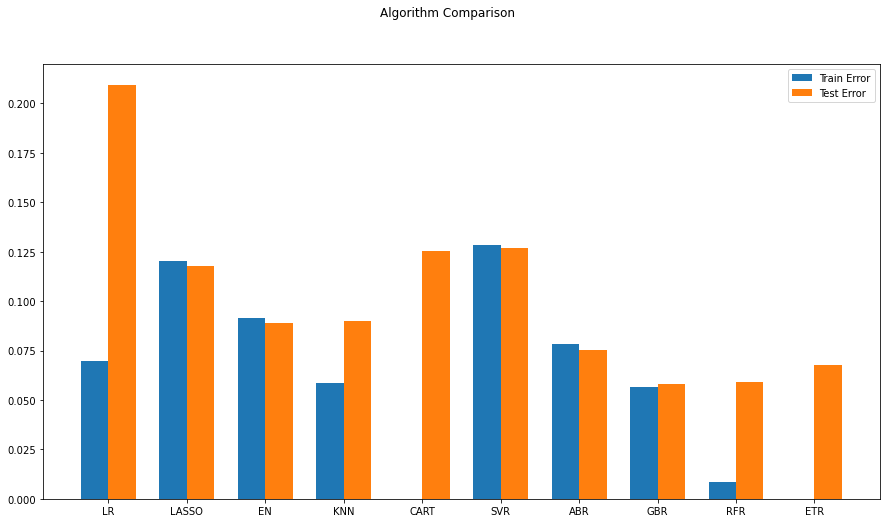

In [20]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

Looking at the training and test error, we should pick something with low test error. We can see emsembles method work especially well here.

If there's GPU compute resources, we are able to include more algorithms. For example,

`models.append(('MLP', MLPRegressor()))`

We can also look at time series model, ARIMA, LSTM, etc.

For this project, we will focus on the using gradient boosting regressor, for calculation of v@r and traunche.

In [25]:
for name, model in models:
    if name != "GBR":
        continue
    # names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    # kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    # train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    # test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)
    if name == "GBR":
        break

GBR: 0.061494 (0.004519) 0.056297 0.058186


In [30]:
loss_model = res

In [31]:
%store loss_model

Stored 'loss_model' (GradientBoostingRegressor)


In [39]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/weihong15/model-building


'https://jovian.ai/weihong15/model-building'